Engy-5050 Spring 2022 UMass Lowell; Prof. V. F. de Almeida **14Jan2022**

# 04. Neutron Diffusion from a Cylinder Source
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\rhat}{\hat{\boldsymbol{r}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Natural/Natural Boundary Conditions](#p1)
1. [Alternative Problem Statement](#p2)
1. [Galerkin's Method w/ Finite Element Basis Functions](#p3)
1. ["Line Source in Infinite Domain"](#inf-case)
   + [Data](#data-sym)
   + [Finite Element Lagrange Basis Functions](#fembf-sym)
   + [Results](#results-sym)
1. ["Line" Source in a Finite Domain w/ Vacuum Boundary](#vac-case)
   + [Data](#data-vac)
   + [Finite Element Lagrange Basis Functions](#fembf-vac)
   + [Results](#results-vac)
---

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D, cylindrical coordinates, neutron diffusion from a line source problem using multiple regions.

## [Boundary-Value Problem Statement](#toc)<a id="p1"></a>

Solve the heterogeneous spatial neutron flux magnitude diffusion problem. Find $u_1:[0,R]\subset\Reals\rightarrow\Reals$, $u_2:[R,R_\infty]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\frac{1}{r}\bigl(-D_1\, r\, u_1'\bigr)'(r) - \Sigma_{a,1}\,u_1(r) + s_0^{(1)} &= 0 \quad\quad \forall \quad\quad r\in\ ]0,R[, \\
 -\frac{1}{r}\bigl(-D_2\, r\, u_2'\bigr)'(r) - \Sigma_{a,2}\,u_2(r) + s_0^{(2)} &= 0 \quad\quad \forall \quad\quad r\in\ ]R,R_\infty[, \\
 q_{1,n}(0) &= 0, \\
 q_{2,n}(\infty) &= q_{2,n\infty}, \\
 u_1(R) &= u_2(R), \\
 q_{1,n}(R) &= q_{2,n}(R), \\
\end{align*}
   
Given data: diffusion coefficients, $D$, macroscopic absorption cross sections, $\Sigma_a$, source $s_0$, boundary conditions of normal flux, and continuity conditions at the interfaces (both normal flux and solution). Where $q_{i,n}(r) = \flux_i(r)\cdot\normal(r) = -D_i\,u_i'(r)\,\rhat \cdot \normal(r) \ \forall \ i=1,2$.

## [Alternative Boundary-Value Problem Statement](#toc)<a id="p2"></a>

Solve the equivalent heterogeneous spatial neutron flux magnitude diffusion problem. Find $u:[0,R_\infty]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{1}{r}\bigl(-D(r)\, r\, u'\bigr)'(r) - \Sigma_a(r)\,u(r) + s_0(r) &= 0 \quad\quad \forall \quad\quad r\in\ ]0,R_\infty[, \\
 q_n(0) &= 0, \\
 q_n(R_\infty) &= q_{nR_\infty}, \\
\end{align*}
   
Given data: diffusion coefficient, $D(r)$, macroscopic absorption cross section, $\Sigma_a(r)$, source $s_0(r)$, and normal flux boundary conditions. Where $q_n(r) = \flux(r)\cdot\normal(r) = -D(r)\,u_i'(r)\,\rhat \cdot \normal(r)$.

## [Galerkin Method w/ Finite Element Basis Functions](#toc)<a id="p3"></a>

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([0,R_\infty]\bigr)$ so that 

\begin{align*}
\bigl(-D\, u',v'\bigr) - \bigl(\Sigma_a\,u,v\bigr) + \bigl(s_0,v\bigr) + q_n(R_\infty)\,v(R_\infty)\,R_\infty &= 0 \quad\quad \forall \quad\quad v \in H^1\!\bigl([0,R_\infty]\bigr), 
\end{align*}

where $H^1\!\bigl([0,R_\infty]\bigr) := \bigl\{ u:[0,R_\infty]\subset\Reals\rightarrow \Reals \mid \bigl(u',u'\bigr) + \bigl(u,u\bigr) < \infty\bigr\}$. Because $u$ and $v$ belong to the same space of functions, this variational form is called the Galerkin's variational form. Choosing a finite dimensional subspace of $H^1\!\bigl([0,R_\infty]\bigr)$, say $V_N([0,R_\infty]) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \bigr\} \subset H^1\!\bigl([0,R_\infty]\bigr)$, where $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(0,R_\infty)$, the coefficients $\cvec := \{c_i\mid i=1,\ldots,N\}$ can be computed by solving the linear system of algebraic equations

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $
  + $b_i = (s_0,\phi_i) - q_{nR_\infty}\,\phi_i(R_\infty)\,R_\infty$
  
Note: this method is identical to the Rayleigh-Ritz method, therefore the approximate solution  $u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i$ is a minimizer of a particular norm (*i.e.* the energy norm). In addition, in cylindrical coordinates, the inner products read

\begin{align*}
\bigl(-D\, u',v'\bigr) &= \int\limits_0^{R_\infty} D(r)\, u'(r)\,v'(r)\, r\,dr  \\
\bigl(\Sigma_a\,u,v\bigr) &= \int\limits_0^{R_\infty} \Sigma_a(r)\,u(r)\,v(r)\,r\,dr \\
\bigl(s_0,v\bigr) &= \int\limits_0^{R_\infty} s_0(r)\,v(r)\,r\,dr
\end{align*}

## ["Line Source in an Infinite Domain"](#toc)<a id="inf-case"></a>

Consider an inner cylinder source with a very small radius surrounded by annular region with a large radius. 

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [2]:
'''Domain'''
r_0 = 0*unit.cm 
r_R = .25*unit.cm
r_oo = 30*unit.cm  # infinity

In [3]:
'''Domain'''

def show_domain(r_R, r_oo):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    radius_i = r_R
    radius_o = r_oo
    height = 2*r_oo
    outer = pv.Cylinder(center=(0,0,0), direction=(0,0,1), radius=radius_o, height=height)
    inner = pv.Cylinder(center=(0,0,0), direction=(0,0,1), radius=radius_i, height=height)

    plo = pv.Plotter(notebook=True, shape=(1,1), off_screen=True) 
    plo.subplot(0,0)
    plo.add_mesh(outer, color='yellow', opacity=0.4,)
    plo.add_mesh(inner, color='red', opacity=1)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Z')
    plo.screenshot('domain.png', window_size=(1000,400))
    plo.camera.zoom(1.2)
    cpos = plo.show(window_size=(1000, 400), auto_close=False)
    return plo

In [4]:
plo = show_domain(r_R, r_oo)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

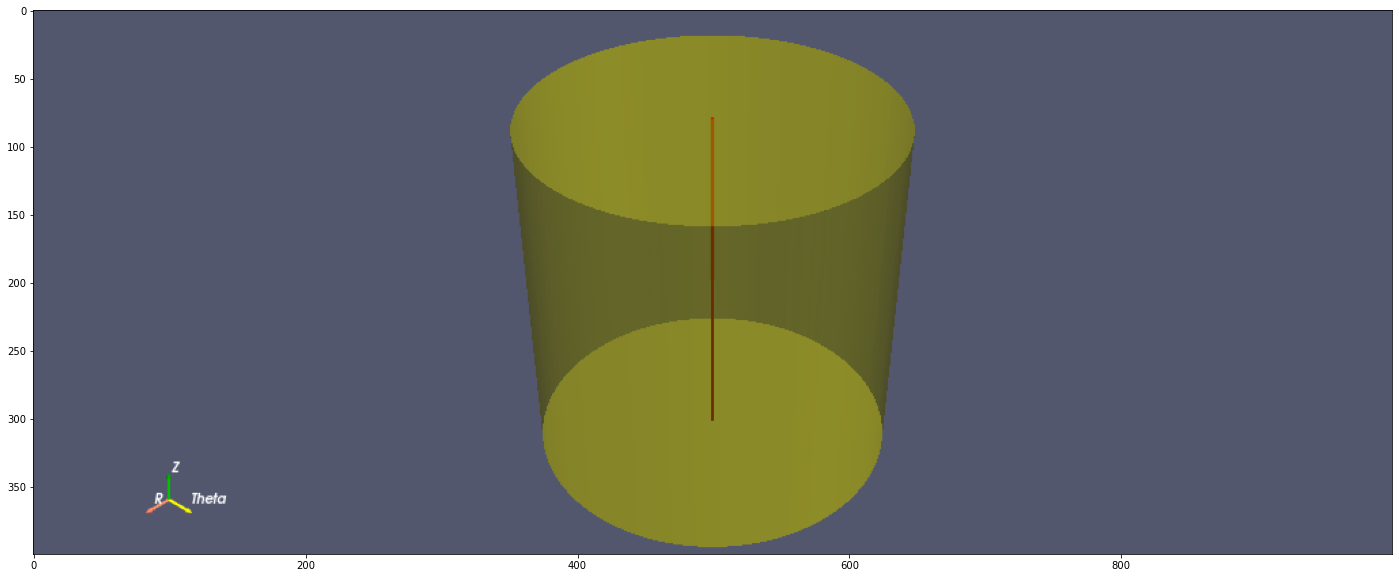

In [5]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-sym"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $q_{nR_\infty}$


In [6]:
'''Parameters and data'''
import math

# Source
diffusion_coeff_1 = 1.5*unit.cm
sigma_a_1 = 0.005/unit.cm
source_1_prime = 1/unit.cm/unit.second
area = math.pi*(r_R)**2
source_1 = source_1_prime/area

# Right side material
diffusion_coeff_2 = 1.0*unit.cm
sigma_a_2 = 0.01/unit.cm
source_2 = 0./unit.cm**3/unit.second

# normal flux
q_noo = 0.0*unit.cm**2/unit.second

In [7]:
print('s_1 [#/cm^3-s] = ', source_1*unit.cm**3*unit.second)

s_1 [#/cm^3-s] =  5.092958178940652


In [8]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))

L1 [cm] = 1.732e+01
L2 [cm] = 1.000e+01


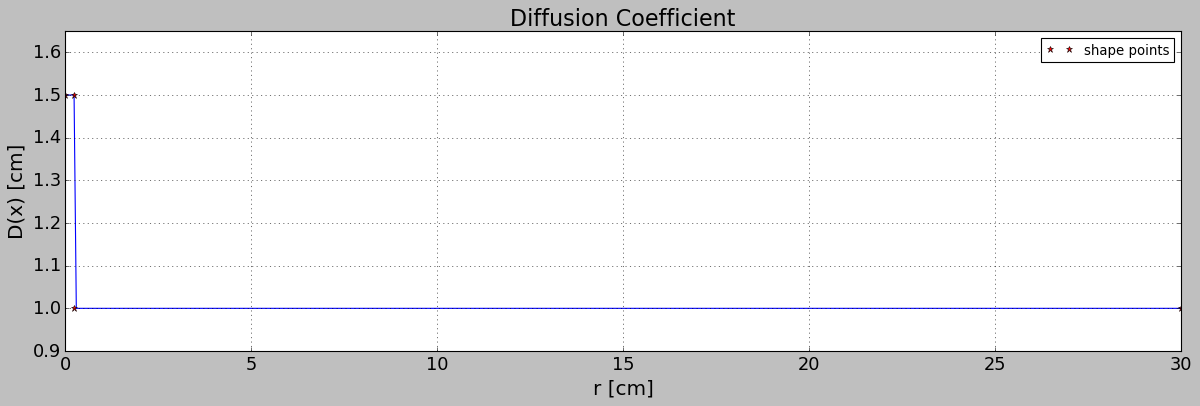

In [9]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

shape_pts = [(r_0, diffusion_coeff_1), (r_R, diffusion_coeff_1), 
             (r_R, diffusion_coeff_2), (r_oo, diffusion_coeff_2)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='r [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*1.1])

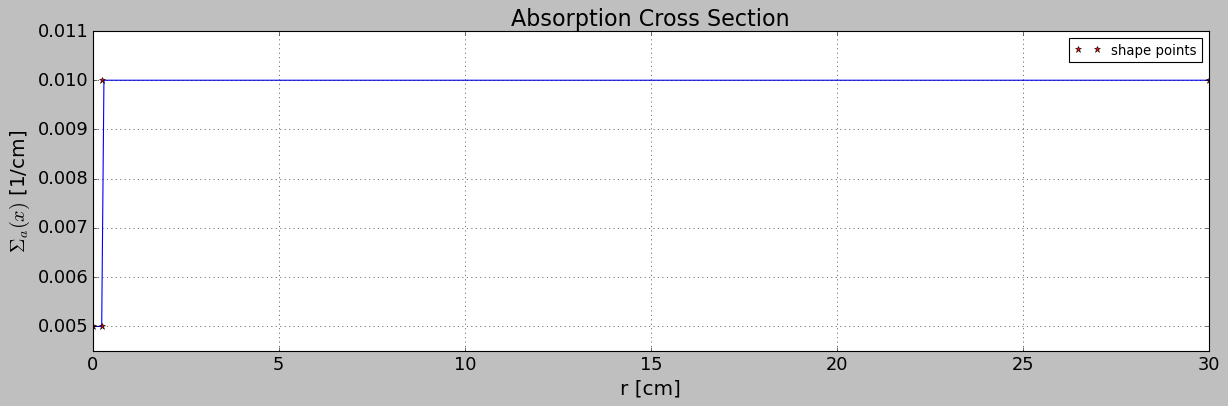

In [10]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(r_0, sigma_a_1), (r_R, sigma_a_1), 
             (r_R, sigma_a_2), (r_oo, sigma_a_2)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='r [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2)*unit.cm*1.1])

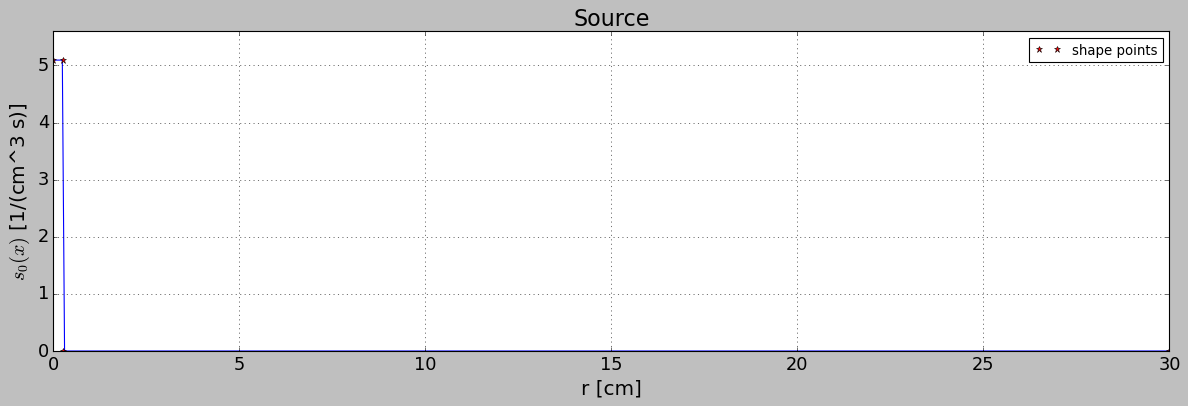

In [11]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(r_0, source_1), (r_R, source_1), 
             (r_R, source_2), (r_oo, source_2)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='r [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-sym"></a>

Specify basis functions distribution on the material domain and degree.

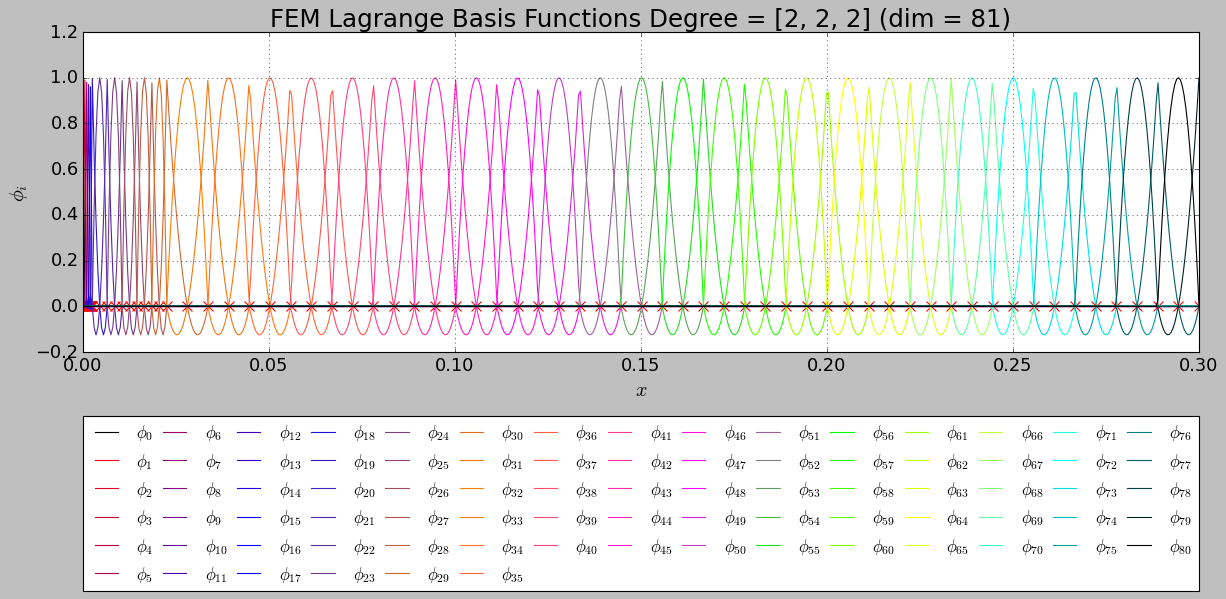

In [12]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,2,2]
n_elem = [10,5,25]

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[r_0, r_R, r_R+2*unit.cm, r_oo])
femlb.plot(n_plot_pts=600, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $

In [13]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'", coord_sys='cylindrical')
a_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v', coord_sys='cylindrical')

a_mtrx = d_mtrx + a_mtrx

In [14]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx, tol=1e-6) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

import numpy as np
print(np.linalg.matrix_rank(a_mtrx), a_mtrx.shape)

matrix is full rank.
81 (81, 81)


 + $b_i = (s_0,\phi_i) - q_{nR_\infty}\,\phi_i(R_\infty)\,R_\infty$

In [15]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v', coord_sys='cylindrical')
qnoo_vec = femlb.boundary_inner_product_vector('right', lambda x: q_noo * r_oo, 'v')

b_vec = s_vec - qnoo_vec

In [16]:
'''Compute optimal coefficient eigenvectors'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [17]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [18]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

### [Results](#toc)<a id="results-sym"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [19]:
'''Plot solution'''

def plot_solution(x, u_values, q_values, 
                  u_legend='Solution w/ Neumann BC', 
                  q_legend='Flux w/ Neumann BC'):
    
    import matplotlib.pyplot as plt
    (fig, ax1) = plt.subplots(1, figsize=(14, 6))

    ax1.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label=u_legend)

    ax1.set_xlabel(r'$r$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$', fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)

    # create a twin x axis to be shared
    ax2 = ax1.twinx()

    ax2.plot(x/unit.cm, q_values*unit.cm**2*unit.second, 'b-', label=q_legend)

    ax2.set_ylabel(r"$q_h(x)$", fontsize=18, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax2.legend(loc='center right', fontsize=12)
    #ax2.set_ylim(0,2)
    #ax2.grid(True)

    plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

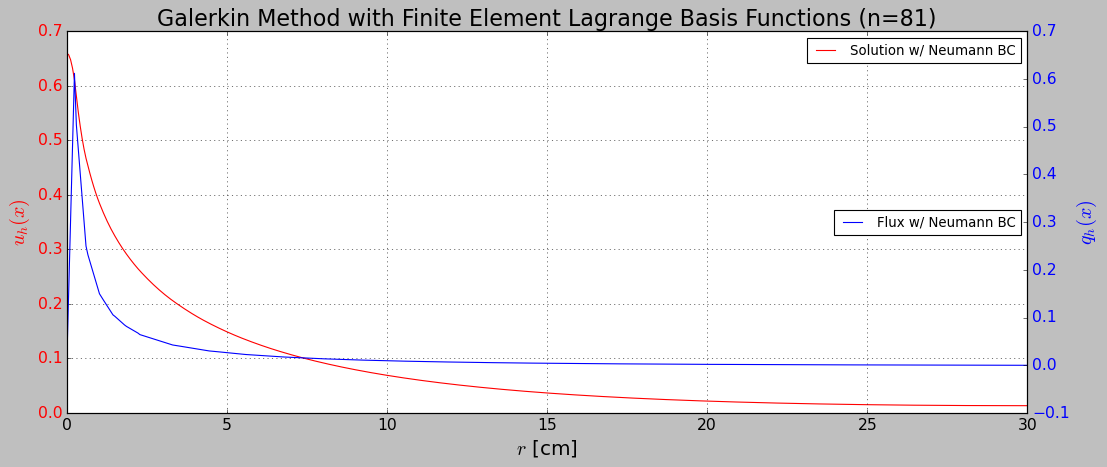

In [20]:
n_pts = 500
x = np.linspace(r_0, r_oo, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values)

In [21]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(0) [cm^2/s]= ', u_star(0)*unit.cm**2*unit.second, '  u^*_N(Roo) [cm^2/s]= ', u_star(r_oo)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0)*unit.cm*unit.second, " u^*'_N(Roo) [cm/s]= ", u_prime_star(r_oo)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(0) [cm^2/s]=  [0.66008]   u^*_N(Roo) [cm^2/s]=  [0.01343]
u^*'_N(0) [cm/s]=  [4.41858e-05]  u^*'_N(Roo) [cm/s]=  [0.00539]
u^*_N(0) [cm^2/s]=  [0.66008]
u^*'_N(0) [cm/s]=  [4.41858e-05]


For an infinitesimal line source (class notes), there is a singularity at the origin: $\phi_{1} (r) ?= \frac{\dot{s}_0}{4\pi\,D_1\,r}\,e^{\frac{-r}{L_1}}$ where $s'_0 = \lim_{\delta\rightarrow 0^+} \delta^2\,s_0^{(1)}$ with $\delta$ as the radius of the source.

For an infinitesimal line source, the limit obtained is $\bigl(4\pi\,r^2\,q_{1}(r)\bigr)\bigr|_0 = \dot{s}_0$.

In [22]:
'''Error on 4\pi r^2 q_n1(0) for a point source'''

import math
s1_dot_limit = source(r_R*.99) * r_R**3 
print('(s_dot-s_dot_limit relative error [%]= ', abs(-(-diffusion_coeff_1*u_prime_star(r_R))*4*math.pi*r_R**2-s1_dot_limit/s1_dot_limit*100))

(s_dot-s_dot_limit relative error [%]=  [186.9646]


This shows that the singular case is not approached by the symmetry boundary condition.

In [23]:
'''Flux at origin boundary'''

print('q_n0 given    [cm2/s]= ', 0)
print('q_n0 computed [cm2/s]= ', -(-diffusion_coeff(0)*u_prime_star(0))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_n0 given    [cm2/s]=  0
q_n0 computed [cm2/s]=  [6.62786e-09]


In [24]:
'''Flux at right boundary'''

print('q_noo given    [cm^2/s]= ', q_noo)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(r_oo)*u_prime_star(r_oo)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_noo given    [cm^2/s]=  0.0
q_nb computed [cm^2/s]=  [-5.3911e-07]


In [25]:
x_vec = np.linspace(0, r_oo, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('r [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

r [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
+0.00000e+00   +6.60079e-01     -6.62786e-09
+7.69231e-01   +4.29739e-01     +2.07086e-01
+1.53846e+00   +3.21063e-01     +1.00488e-01
+2.30769e+00   +2.59226e-01     +6.38303e-02
+3.07692e+00   +2.16421e-01     +4.74616e-02
+3.84615e+00   +1.84693e-01     +3.67075e-02
+4.61538e+00   +1.59638e-01     +2.90594e-02
+5.38462e+00   +1.39272e-01     +2.38923e-02
+6.15385e+00   +1.22473e-01     +2.00687e-02
+6.92308e+00   +1.08326e-01     +1.69357e-02
+7.69231e+00   +9.62528e-02     +1.44554e-02
+8.46154e+00   +8.58938e-02     +1.25389e-02
+9.23077e+00   +7.69271e-02     +1.08805e-02
+1.00000e+01   +6.91042e-02     +9.45900e-03
+1.07692e+01   +6.22585e-02     +8.34020e-03
+1.15385e+01   +5.62470e-02     +7.34457e-03
+1.23077e+01   +5.09415e-02     +6.46619e-03
+1.30769e+01   +4.62480e-02     +5.73674e-03
+1.38462e+01   +4.20938e-02     +5.09293e-03
+1.46154e+01   +3.84054e-02     +4.51449e-03
+1.53846e+01   +3.51250e-02     +4.01455e-03
+1.61538

In [26]:
x_vec

array([0.     , 0.00769, 0.01538, 0.02308, 0.03077, 0.03846, 0.04615,
       0.05385, 0.06154, 0.06923, 0.07692, 0.08462, 0.09231, 0.1    ,
       0.10769, 0.11538, 0.12308, 0.13077, 0.13846, 0.14615, 0.15385,
       0.16154, 0.16923, 0.17692, 0.18462, 0.19231, 0.2    , 0.20769,
       0.21538, 0.22308, 0.23077, 0.23846, 0.24615, 0.25385, 0.26154,
       0.26923, 0.27692, 0.28462, 0.29231, 0.3    ])

In [27]:
u_n_vec

array([0.66008, 0.42974, 0.32106, 0.25923, 0.21642, 0.18469, 0.15964,
       0.13927, 0.12247, 0.10833, 0.09625, 0.08589, 0.07693, 0.0691 ,
       0.06226, 0.05625, 0.05094, 0.04625, 0.04209, 0.03841, 0.03512,
       0.03221, 0.02962, 0.02731, 0.02526, 0.02344, 0.02183, 0.0204 ,
       0.01915, 0.01805, 0.01709, 0.01627, 0.01556, 0.01497, 0.01448,
       0.01409, 0.0138 , 0.01359, 0.01347, 0.01343])

In [28]:
q_N_vec

array([-6.62786e-09,  2.07086e-01,  1.00488e-01,  6.38303e-02,
        4.74616e-02,  3.67075e-02,  2.90594e-02,  2.38923e-02,
        2.00687e-02,  1.69357e-02,  1.44554e-02,  1.25389e-02,
        1.08805e-02,  9.45900e-03,  8.34020e-03,  7.34457e-03,
        6.46619e-03,  5.73674e-03,  5.09293e-03,  4.51449e-03,
        4.01455e-03,  3.57676e-03,  3.17819e-03,  2.82238e-03,
        2.51276e-03,  2.22774e-03,  1.96611e-03,  1.73917e-03,
        1.52800e-03,  1.33202e-03,  1.15654e-03,  9.93906e-04,
        8.41046e-04,  7.00044e-04,  5.68896e-04,  4.43801e-04,
        3.25111e-04,  2.13351e-04,  1.04927e-04, -5.39110e-07])

## ["Cylindrical Source in a Finite Domain w/ Vacuum Boundary"](#toc)<a id="vac-case"></a>

Consider an inner cylinder source with a small radius surrounded by annular region with a finite radius exposed to vacuum. 

The boundary normal flux boundary conditions are as follows:

\begin{align*}
 q_n(0) &= 0, \\
 q_n(R_b) &= \frac{u}{2}.
\end{align*}

### [Data](#toc)<a id="data-vac"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$


In [29]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [30]:
'''Domain'''
r_0 = 0*unit.cm 
r_R = .25*unit.cm
r_b = 10*unit.cm

In [31]:
plo = show_domain(r_R, r_b)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

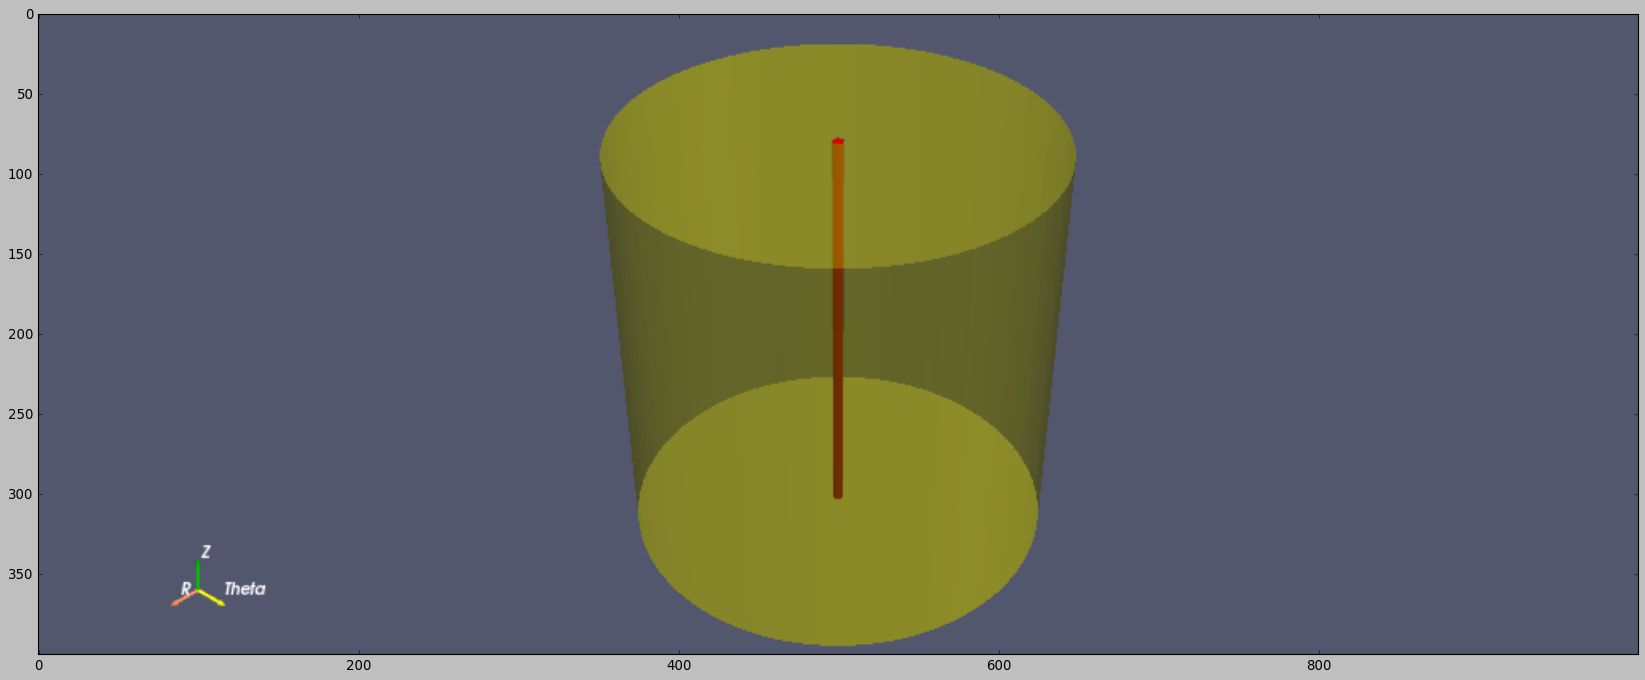

In [32]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

In [33]:
'''Parameters and data'''

# Source
diffusion_coeff_1 = 1.5*unit.cm
sigma_a_1 = 0.005/unit.cm
source_1_prime = 1/unit.cm/unit.second
area = math.pi*(r_R)**2
source_1 = source_1_prime/area

# Right side material
diffusion_coeff_2 = 1.0*unit.cm
sigma_a_2 = 0.01/unit.cm
source_2 = 0./unit.cm**3/unit.second

In [34]:
print('s_1 [#/cm^3-s] = ', source_1*unit.cm**3*unit.second)

s_1 [#/cm^3-s] =  5.092958178940652


In [35]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))

L1 [cm] = 1.732e+01
L2 [cm] = 1.000e+01


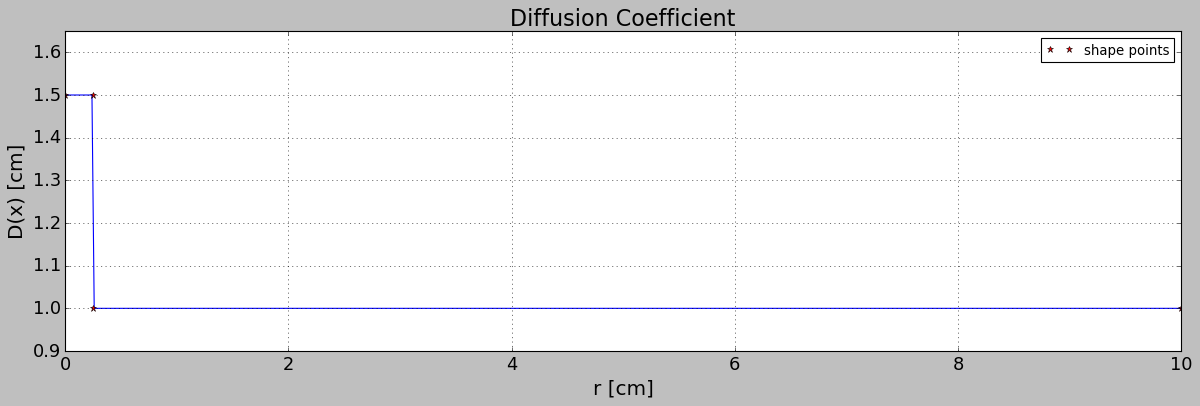

In [36]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

shape_pts = [(r_0, diffusion_coeff_1), (r_R, diffusion_coeff_1), 
             (r_R, diffusion_coeff_2), (r_b, diffusion_coeff_2)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='r [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*1.1])

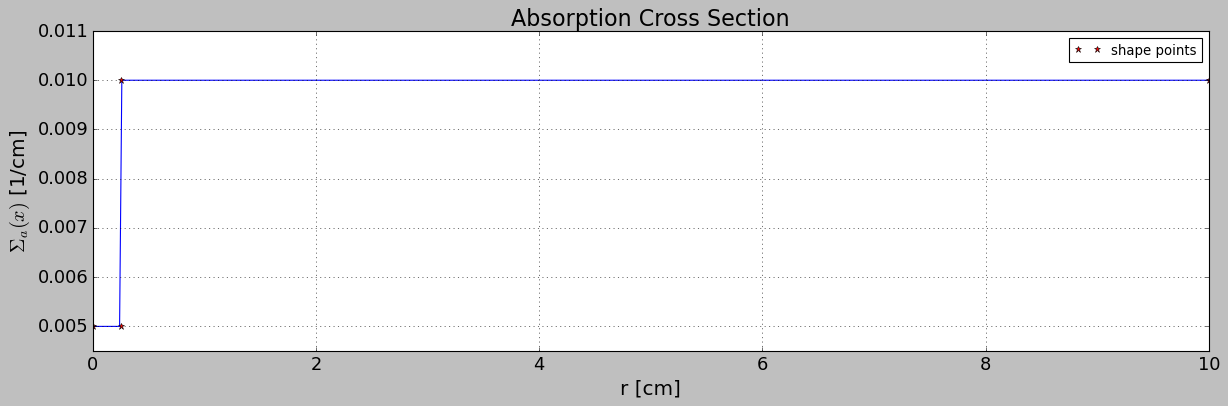

In [37]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(r_0, sigma_a_1), (r_R, sigma_a_1), 
             (r_R, sigma_a_2), (r_b, sigma_a_2)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='r [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2)*unit.cm*1.1])

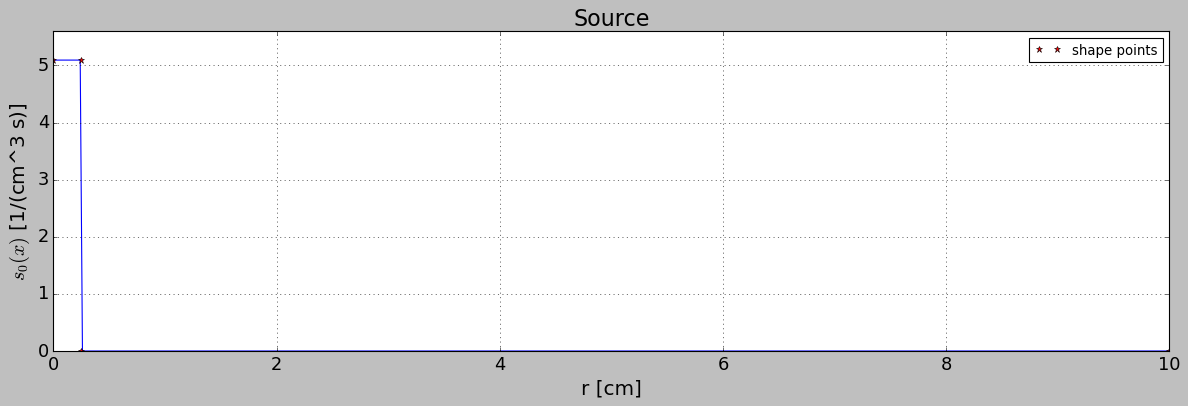

In [38]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(r_0, source_1), (r_R, source_1), 
             (r_R, source_2), (r_b, source_2)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='r [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-vac"></a>

Specify basis functions distribution on the material domain and degree.

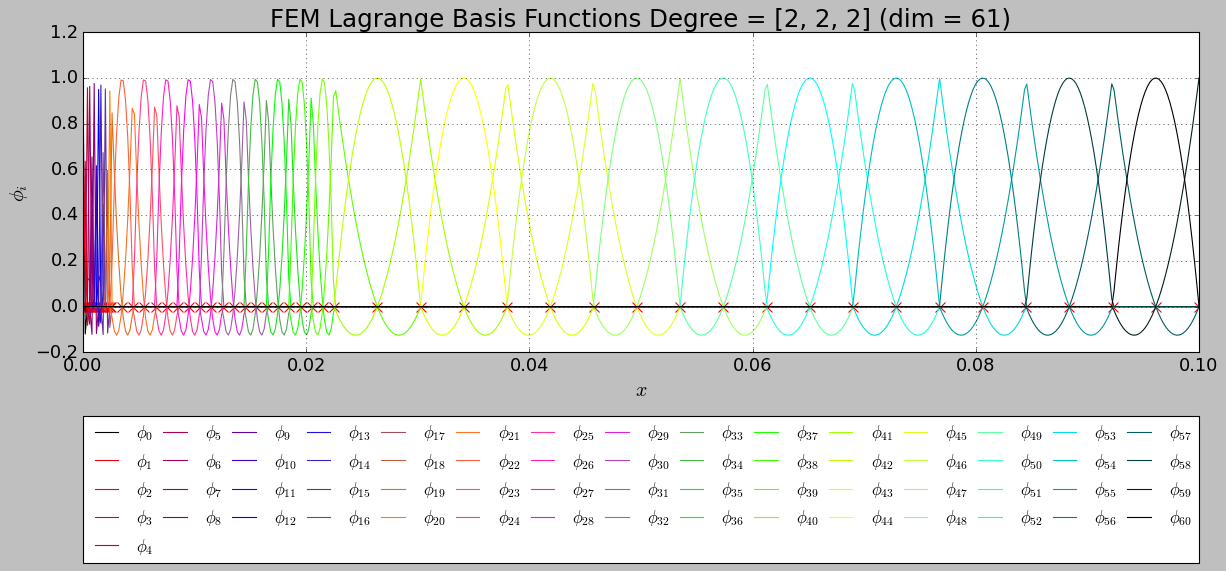

In [39]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,2,2]
n_elem = [10,10,10] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[r_0, r_R, r_R+2*unit.cm, r_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = \bigl(D\,\phi'_j,\phi'_i\bigr) + \bigl(\Sigma_a\,\phi_j,\phi_i\bigr) + 1/2\,\phi_j(R_b)\,\phi_i(R_b)\,R_b $

In [40]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'", coord_sys='cylindrical')
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v', coord_sys='cylindrical')

r_mtrx_b = femlb.boundary_inner_product_matrix('right', lambda x:1/2*r_b, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx + r_mtrx_b

In [41]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx,tol=1e-6) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


 + $b_i = \bigl(s_0,\phi_i\bigr)$

In [42]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v', coord_sys='cylindrical')

b_vec = s_vec

In [43]:
'''Compute optimal coefficient eigenvectors'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [44]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [45]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

### [Results](#toc)<a id="results-vac"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

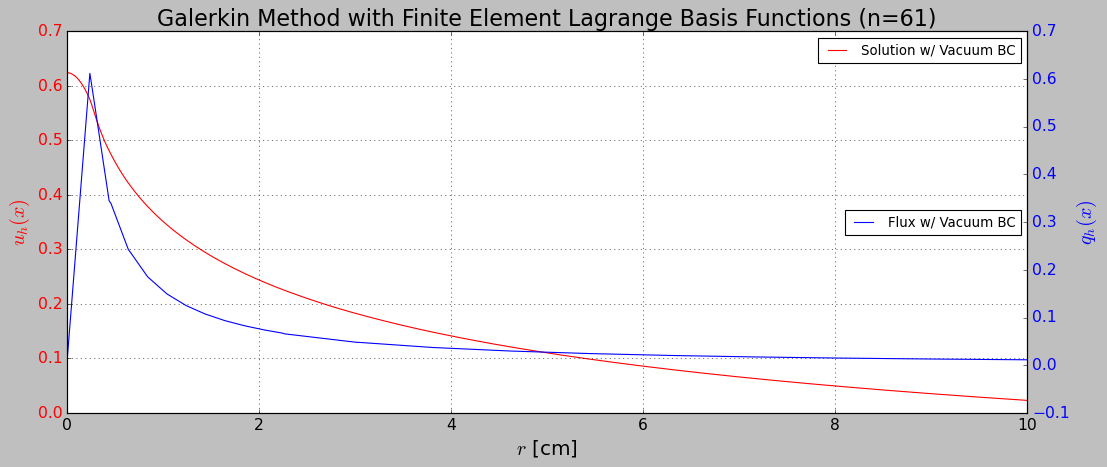

In [46]:
n_pts = 500
x = np.linspace(r_0, r_b, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values, u_legend='Solution w/ Vacuum BC', q_legend='Flux w/ Vacuum BC')

In [47]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(0) [cm^2/s]= ', u_star(0)*unit.cm**2*unit.second, '  u^*_N(Rb) [cm^2/s]= ', u_star(r_b)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0)*unit.cm*unit.second, " u^*'_N(Rb) [cm/s]= ", u_prime_star(r_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(0) [cm^2/s]=  [0.62432]   u^*_N(Rb) [cm^2/s]=  [0.0231]
u^*'_N(0) [cm/s]=  [4.41877e-05]  u^*'_N(Rb) [cm/s]=  [-115.28612]
u^*_N(0) [cm^2/s]=  [0.62432]
u^*'_N(0) [cm/s]=  [4.41877e-05]


In [48]:
'''Flux at origin boundary'''

print('q_n0 given    [cm2/s]= ', 0)
print('q_n0 computed [cm2/s]= ', -(-diffusion_coeff(0)*u_prime_star(0))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_n0 given    [cm2/s]=  0
q_n0 computed [cm2/s]=  [6.62816e-09]


In [49]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', 1/2*u_star(r_b)*unit.cm**2*unit.second)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(r_b)*u_prime_star(r_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  [0.01155]
q_nb computed [cm^2/s]=  [0.01153]


In [50]:
x_vec = np.linspace(0, r_b, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('r [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

r [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
+0.00000e+00   +6.24317e-01     -6.62816e-09
+2.56410e-01   +5.67475e-01     +5.92016e-01
+5.12821e-01   +4.57346e-01     +3.11217e-01
+7.69231e-01   +3.93044e-01     +2.06327e-01
+1.02564e+00   +3.47742e-01     +1.52681e-01
+1.28205e+00   +3.12834e-01     +1.21629e-01
+1.53846e+00   +2.84470e-01     +1.00869e-01
+1.79487e+00   +2.60662e-01     +8.57316e-02
+2.05128e+00   +2.40207e-01     +7.42716e-02
+2.30769e+00   +2.22357e-01     +6.49610e-02
+2.56410e+00   +2.06479e-01     +5.88874e-02
+2.82051e+00   +1.92159e-01     +5.28138e-02
+3.07692e+00   +1.79366e-01     +4.75441e-02
+3.33333e+00   +1.67642e-01     +4.39086e-02
+3.58974e+00   +1.56849e-01     +4.02731e-02
+3.84615e+00   +1.46978e-01     +3.69805e-02
+4.10256e+00   +1.37805e-01     +3.45672e-02
+4.35897e+00   +1.29251e-01     +3.21538e-02
+4.61538e+00   +1.21312e-01     +2.99094e-02
+4.87179e+00   +1.13862e-01     +2.81984e-02
+5.12821e+00   +1.06851e-01     +2.64874e-02
+5.38462

In [51]:
x_vec

array([0.     , 0.00256, 0.00513, 0.00769, 0.01026, 0.01282, 0.01538,
       0.01795, 0.02051, 0.02308, 0.02564, 0.02821, 0.03077, 0.03333,
       0.0359 , 0.03846, 0.04103, 0.04359, 0.04615, 0.04872, 0.05128,
       0.05385, 0.05641, 0.05897, 0.06154, 0.0641 , 0.06667, 0.06923,
       0.07179, 0.07436, 0.07692, 0.07949, 0.08205, 0.08462, 0.08718,
       0.08974, 0.09231, 0.09487, 0.09744, 0.1    ])

In [52]:
u_n_vec

array([0.62432, 0.56747, 0.45735, 0.39304, 0.34774, 0.31283, 0.28447,
       0.26066, 0.24021, 0.22236, 0.20648, 0.19216, 0.17937, 0.16764,
       0.15685, 0.14698, 0.13781, 0.12925, 0.12131, 0.11386, 0.10685,
       0.10028, 0.09406, 0.08817, 0.08261, 0.07732, 0.07228, 0.06749,
       0.06291, 0.05853, 0.05434, 0.05032, 0.04646, 0.04276, 0.03919,
       0.03574, 0.03242, 0.02921, 0.0261 , 0.0231 ])

In [53]:
q_N_vec

array([-6.62816e-09,  5.92016e-01,  3.11217e-01,  2.06327e-01,
        1.52681e-01,  1.21629e-01,  1.00869e-01,  8.57316e-02,
        7.42716e-02,  6.49610e-02,  5.88874e-02,  5.28138e-02,
        4.75441e-02,  4.39086e-02,  4.02731e-02,  3.69805e-02,
        3.45672e-02,  3.21538e-02,  2.99094e-02,  2.81984e-02,
        2.64874e-02,  2.48672e-02,  2.35986e-02,  2.23300e-02,
        2.11131e-02,  2.01424e-02,  1.91716e-02,  1.82312e-02,
        1.74713e-02,  1.67113e-02,  1.59693e-02,  1.53647e-02,
        1.47600e-02,  1.41658e-02,  1.36792e-02,  1.31926e-02,
        1.27117e-02,  1.23173e-02,  1.19230e-02,  1.15286e-02])